<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S11/S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from google.colab import files
#src = list(files.upload().values())[0]
#open('dataloader_s11.py','wb').write(src)
import dataloader_s11 as dl
#src = list(files.upload().values())[0]
#open('plotimagefinal.py','wb').write(src)
import plotimagefinal as pimage
#src = list(files.upload().values())[0]
#open('model_s11.py','wb').write(src)
import model_s11 as modeldef
import torch
#src = list(files.upload().values())[0]
#open('lr_finder.py','wb').write(src)
from lr_finder import LRFinder
#src = list(files.upload().values())[0]
#open('modeltraintest16.py','wb').write(src)
import modeltraintest16 as modeltrt
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)
import utils as utils
import torch.nn as nn
import os

  pip install torch-lr-finder -v --global-option="amp"


In [2]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-k4r67lsx
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-k4r67lsx
     |████████████████████████████████| 634kB 7.6MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=507925745fbd6bbb2689ff1f1588aaa1694076e81741e5873cbdb11d7875ae6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nvjv239/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=faa428b5e597b3e2b38de276a8571d57e5976a724e026989ee5debb03428c418
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nvjv239/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
mean0 0.49186864
mean1 0.48265335
mean2 0.44717798
std0 0.24697131
std1 0.24338901
std2 0.26159254
channel mean 0.47390000025431317
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
meandata[0]: 0.49186864
Files already downloaded and verified
CUDA Available? True


plane   dog  deer  deer


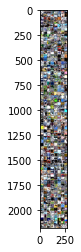

In [2]:
train_loader,test_loader,classes=dl.load_data()
pimage.show_random_images(train_loader,classes)


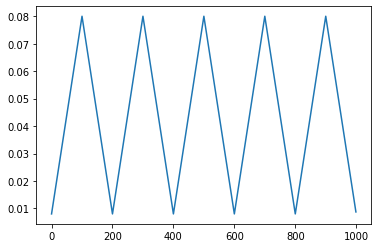

In [3]:
pimage.plotCyclicLR(total_iterations=1000, min_lr=0.008, max_lr=0.08, step_size=100)

In [29]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = modeldef.S11Model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


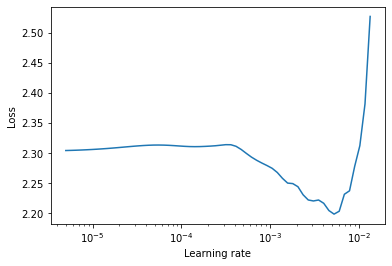

In [19]:
import torch.optim as optim

#model = modeldef.S11Model().to(device)
criterion = nn.NLLLoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.90,weight_decay=5e-4)
#modeltrt.lrfinder(model, device, train_loader, optimizer)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader=train_loader, val_loader=test_loader, start_lr=0.000001, end_lr=0.5,num_iter=98)
lr_finder.plot()
lr_finder.reset()

In [30]:
import torch.optim.lr_scheduler as lrs
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
pctstart=5./24.
print('pctstart',pctstart)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.03, base_momentum=0.83, max_momentum=0.93,steps_per_epoch=980,epochs=24,div_factor=8.0, pct_start=pctstart, final_div_factor=8.0)
EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    modeltrt.train(model, device, train_loader, optimizer, epoch)
    modeltrt.test(model, device, test_loader)
    scheduler.step()


  0%|          | 0/98 [00:00<?, ?it/s]

pctstart 0.20833333333333334
EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.6615, Accuracy: 4162/10000 (41.62%)

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.3764, Accuracy: 4943/10000 (49.43%)

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.4307, Accuracy: 5000/10000 (50.00%)

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.1781, Accuracy: 5809/10000 (58.09%)

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.2012, Accuracy: 5828/10000 (58.28%)

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.0908, Accuracy: 6061/10000 (60.61%)

EPOCH: 6


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.0703, Accuracy: 6162/10000 (61.62%)

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.9595, Accuracy: 6602/10000 (66.02%)

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.9398, Accuracy: 6628/10000 (66.28%)

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.9091, Accuracy: 6796/10000 (67.96%)

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8825, Accuracy: 6888/10000 (68.88%)

EPOCH: 11


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 1.1335, Accuracy: 6339/10000 (63.39%)

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8014, Accuracy: 7147/10000 (71.47%)

EPOCH: 13


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8348, Accuracy: 7027/10000 (70.27%)

EPOCH: 14


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8189, Accuracy: 7134/10000 (71.34%)

EPOCH: 15


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8835, Accuracy: 6946/10000 (69.46%)

EPOCH: 16


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.7507, Accuracy: 7296/10000 (72.96%)

EPOCH: 17


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.8319, Accuracy: 7115/10000 (71.15%)

EPOCH: 18


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.7425, Accuracy: 7416/10000 (74.16%)

EPOCH: 19


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.6855, Accuracy: 7644/10000 (76.44%)

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.7346, Accuracy: 7389/10000 (73.89%)

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.7090, Accuracy: 7493/10000 (74.93%)

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Avg loss: 0.7795, Accuracy: 7280/10000 (72.80%)

EPOCH: 23


Loss=0.8192570805549622 Accuracy=68.62: 100%|██████████| 98/98 [00:43<00:00,  2.23it/s]



Test set: Avg loss: 0.7218, Accuracy: 7511/10000 (75.11%)

